<a href="https://colab.research.google.com/github/SLaksh/ML/blob/main/K_means_Clustering_wellExplained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Means Clustering**

K-means clustering is a classic unsupervised learning approach that segments a dataset into k-clusters, with each data point assigned to the cluster with the closest mean.

In [1]:
import random
import math
import matplotlib.pyplot as plt

**The Function to parse the columns**

In [2]:
def read_csv(path, columns):
    header = []
    data = []
    size = 0
    with open(path, 'r') as file:
        header = file.readline().strip().split(',')
        for line in file:
            data.append(line.strip().split(','))
            size += 1
    for i in range(size):
        for j in columns:
            data[i][j] = float(data[i][j])
    return header, data, size

# **1. Initialization of the Centroids**

*   It produces an **initial set of centroids by randomly **picking separate data points from the input dataset.
*   This random initialization of centroids is an important phase in K-means since it affects the clustering process's **efficiency and outcome**.
*   The algorithm then iteratively **refines these centroids**, assigning data points to the nearest centroid and until convergence is achieved.





In [3]:
def initialize_centroids(data, columns, size, n_clusters):
    centroids = [[0 for _ in columns] for _ in range(n_clusters)]
    for c_i, d_i in enumerate(random.sample(range(size), n_clusters)):
        for c_j, d_j in enumerate(columns):
            centroids[c_i][c_j] = data[d_i][d_j]
    return centroids

# **2.  Cluster Assignment**

*  It iterates over every data point, calculating the **Euclidean distance to each centroid. **
*   The function then **updates each data point's label to the index of its nearest centroid**, which is obtained using the shortest squared Euclidean distance.
*   This clustering procedure is essential in K-means since it assigns each data point to a cluster, resulting in the establishment of different groups based on feature similarities.





In [4]:
def assign_labels(data, columns, size, centroids):
    labels = [[float('inf'), None] for _ in range(size)]
    for d_index, d_list in enumerate(data):
        for c_index, c_list in enumerate(centroids):
            distance = 0
            for index, value in enumerate(columns):
                distance += (d_list[value]-c_list[index])**2
            squared_distance = math.sqrt(distance)
            if squared_distance < labels[d_index][0]:
                labels[d_index] = [squared_distance, c_index]
    return labels

# **3. Refining Cluster Centers**

*   After all data points have been allocated to the nearest centroid, the **update() function recalculates the centroid** for each cluster.
*   It does this by a**veraging the distinctive features of all data points** given to each cluster.
*   This updating of the centroids based on the current cluster assignments helps the algorithm converge towards an **ideal cluster centres.**





In [5]:
def update_centroids(data, columns, n_clusters, labels):
    new_centroids = [[0 for _ in columns] for _ in range(n_clusters)]
    count = [0 for _ in range(n_clusters)]
    for d_index, d_list in enumerate(data):
        count[labels[d_index][1]] += 1
        for index, value in enumerate(columns):
            new_centroids[labels[d_index][1]][index] += d_list[value]
    for c_index, c_value in enumerate(new_centroids):
        for index, value in enumerate(c_value):
            new_centroids[c_index][index] /= count[c_index]
    return new_centroids

# **4. Evaluating Cluster cohesiveness**

**Inertia**, in K-means, refers to the sum of squared distances between each data point and its corresponding centroid. This function iterates through all data points, accumulating the squared distances from each point to its assigned centroid.

*  The **lower the inertia,** the more cohesive (or tightly grouped) the clusters are, indicating better clustering.
*   **High inertia** suggests that data points are spread out and far from their centroids, implying less optimal clustering.



In [6]:
def calculate_inertia(labels):
    inertia = 0
    for _, value in enumerate(labels):
        inertia += value[0] ** 2
    return inertia

# **5. Optimal Cluster Formation**

1.  The KMeans function encapsulates the entire process of the K-means clustering algorithm.
2.   It begins by **initializing centroids** and iterates through a series of steps to **form clusters.**
3. For each iteration **(determined by n_init)**, it initializes centroids using **initialize_centroids,** then enters a loop where it continuously **assigns labels to data points** based on the nearest centroid using **assign_labels**, and updates the centroids' positions with **update_centroids**.
4. This loop continues until the centroids' positions stabilize (i.e., no further changes occur), indicating that the **clusters have converged.**
5. After each iteration, it calculates the inertia (the sum of squared distances from each point to its centroid) using **calculate_inertia**.
6. The algorithm compares inertia across different initializations and retains the clustering (centroids, labels) with the lowest inertia, as this represents the most compact and well-separated clustering.








In [7]:
def KMeans(data, columns, size, n_clusters, n_init=30):
    centroids = None
    labels = None
    inertia = float('inf')
    for _ in range(n_init):
        centroids_ = initialize_centroids(data, columns, size, n_clusters)
        try:
            while True:
                labels_ = assign_labels(data, columns, size, centroids_)
                new_centroids = update_centroids(
                    data, columns, n_clusters, labels_)
                if new_centroids == centroids_:
                    break
                centroids_ = new_centroids
            inertia_ = calculate_inertia(labels_)
            if inertia_ < inertia:
                centroids, labels, inertia = centroids_, labels_, inertia_
        except:
            continue
    return centroids, labels, inertia

In [8]:
filePath = './Mall_Customers.csv'
columns = [3, 4]
header, data, size = read_csv(filePath, columns)

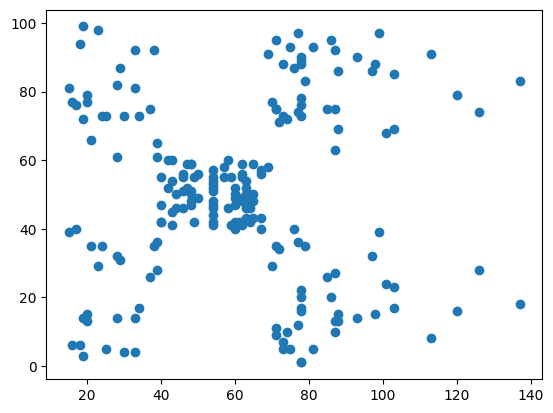

In [9]:
for d in data:
    plt.scatter(float(d[3]), float(d[4]), color='#1f77b4')
plt.show()

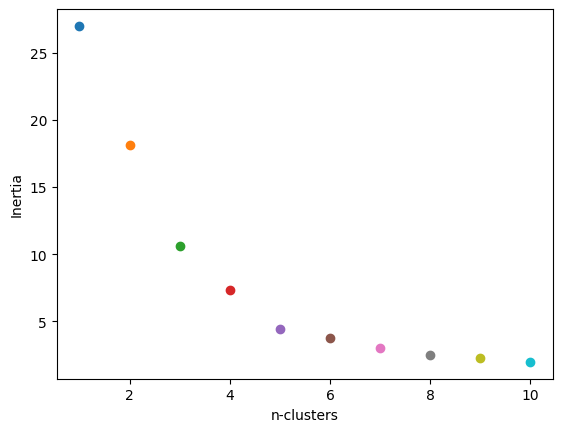

In [10]:
for i in range(1, 11):
    centroids, labels, inertia = KMeans(data, columns, size, i)
    plt.scatter(i, inertia/10000)
plt.xlabel('n-clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
n_clusters = 5
centroids, labels, inertia = KMeans(data, columns, size, n_clusters)
print(inertia)
print(centroids)

44448.4554479337
[[55.2962962962963, 49.51851851851852], [88.2, 17.114285714285714], [26.304347826086957, 20.91304347826087], [25.727272727272727, 79.36363636363636], [86.53846153846153, 82.12820512820512]]


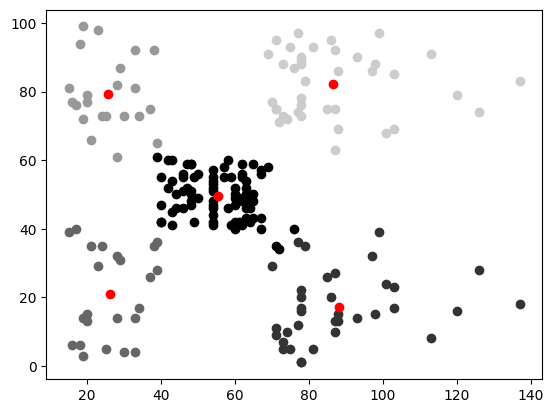

In [14]:
for i, d in enumerate(data):
    c = str(round(labels[i][1]/n_clusters, 1))
    plt.scatter(d[3], d[4], color=c)
for c in centroids:
    plt.scatter(c[0], c[1], color='red')
plt.show()